# Introduction to Data Science Project: Daily News for Stock Market Prediction
## Team member: Chien-Ming Huang, Tong Chen, Po Chun Chen


### Data Source: Kaggle 
https://www.kaggle.com/aaron7sun/stocknews/data
#### News Data: 
Daily top 25 headlines from Reddit WorldNews Channel (/r/worldnews), ranked by reddit users' votes for every date.<br> (Range: 2008-06-08 to 2016-07-01)

#### Stock Data: 
Dow Jones Industrial Average (DJIA).<br> (Range: 2008-08-08 to 2016-07-01)


# Data Pipeline for Daily News for Stock Market Prediction
### Build a binary classfication problem:
"1" when DJIA Adj Close value rose or stayed as the same <br>
"0" when DJIA Adj Close value decreased
### Task Evaluation:
Training Set: Data from 2008-08-08 to 2014-12-31 <br>
Test Set: Data from 2015-01-02 to 2016-07-01 <br>
split approximately 80% / 20%
### Evaluation Metric:
Mainly use AUC as the evaluation metric, also include precison, recall, F1-score, support for comparison)
### Preprocessing:
1. Tokenizes
2. Removes stopwords and coverts headlines to lowercase letters
3. Stems
4. Returns a list of the cleaned text

### Bag of Words (N-Gram Model) & TFIDF Intro:
Perform Count Vecotrizer & TF-IDF transformer

### Feature Selection:
1. Top 3, 10, 25 news

### Model Selection:
Logistic Regression, Naive Bayes, and Random Forest

### Performance Comparison

### Other insight: Key Words visualization

### Future Work

In [1]:
# Dataframe
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import date

# Data Preprocessing
# Make sure conda has nltk pacakge
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

# Evaluation Metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc,precision_score, accuracy_score, recall_score, f1_score
from scipy import interp

# Word Count & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Model Selection
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud # Need pip install wordcloud first
import matplotlib
matplotlib.rcParams["figure.figsize"] = "8, 8"
import re

## Data Import

In [2]:
# Data import & Create combined for all top 25 news
df = pd.read_csv('E:/python/input/Combined_News_DJIA.csv')
df['Combined25']= df.iloc[:, 2:27].apply(lambda row: ''.join(str(row.values)), axis=1)
df.head()
# Label variable: 1 if the DJIA stayed the same or rose on that date
#                 0 if the DJIA decreased on that date

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","[ 'b""Georgia \'downs two Russian warplanes\' a..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...","[ ""b'Why wont America and Nato help us? If the..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...","[ ""b'Remember that adorable 9-year-old who san..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,"[""b' U.S. refuses Israel weapons to attack Ira..."
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Re

In [3]:
# Train data (2008-08-08 to 2014-12-31)
train = df.loc[(pd.to_datetime(df["Date"]) <= date(2014,12,31)),['Label','Combined25']]
train.head()

,Label,Combined25
0,0,"[ 'b""Georgia \'downs two Russian warplanes\' a..."
1,1,"[ ""b'Why wont America and Nato help us? If the..."
2,0,"[ ""b'Remember that adorable 9-year-old who san..."
3,0,"[""b' U.S. refuses Israel weapons to attack Ira..."
4,1,"[""b'All the experts admit that we should legal..."


In [4]:
# Test data (2015-01-02 to 2016-07-01)
test = df.loc[(pd.to_datetime(df["Date"]) > date(2014,12,31)),['Label','Combined25']]
test.head()

,Label,Combined25
1611,1,[ 'Most cases of cancer are the result of shee...
1612,0,[ 'Moscow-&gt;Beijing high speed train will re...
1613,0,"['US oil falls below $50 a barrel'\n ""Toyota g..."
1614,1,"[""'Shots fired' at French magazine HQ""\n '90% ..."
1615,1,[ 'New Charlie Hebdo issue to come out next we...


# ROC Curves Metric

In [5]:
# ROC Curves metric
'''
    Plot ROC curves for the multiclass problem
    based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
'''
def ROCCurves (Actual, Predicted):
    
    # Compute ROC curve and ROC area for each class
    n_classes = 2
    fpr = dict()
    tpr = dict()
    roc_auc= dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Actual.values, Predicted)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Actual.ravel(), Predicted.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    ##############################################################################
    # Plot ROC curves for the multiclass problem

    # Compute macro-average ROC curve and ROC area

    # First aggregate all False Positive Rates

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at this points (include FPR, TPR)
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr[1], tpr[1], label = 'ROC curve of class (area = {1:0.2f})'
                                   ''.format(i, roc_auc[1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")

# Evaluation Model 

In [6]:
# List to keep different methods scores to compare
ScoreSummaryByMethod = []

# Evaluation Model build for analyzing model performance
'''
    Prints and plots
    - classification report
    - confusion matrix
    - ROC-AUC
'''
def Evaluation (Method,Comment,Actual, Predicted):

    print (Method)
    print (Comment)
    print (classification_report(Actual,Predicted))
    print ('Confussion matrix:\n', confusion_matrix(Actual,Predicted))
    ROC_AUC = roc_auc_score(Actual,Predicted)
    print ('ROC-AUC: ' + str(ROC_AUC))
    
    Precision = precision_score(Actual,Predicted)
    Accuracy = accuracy_score(Actual,Predicted)
    Recall = recall_score(Actual,Predicted)
    F1 = f1_score(Actual,Predicted)
    ScoreSummaryByMethod.append([Method,Comment,ROC_AUC,Precision,Accuracy,Recall,F1])

# Text Preprocessing

In [7]:
# Text preprocessing:
'''
1. Tokenizes
2. Removes stopwords and coverts headlines to lowercase letters
3. Stems
4. Returns a list of the cleaned text
'''

def text_process(text):
    if pd.isnull(text):
        return []
    
    # Tokenizes with RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    # Removes any stopwords such as , . ; 
    # Coverts headlines to lowercase letters
    text_processed = [word.lower() for word in text_processed if word.lower() not in stopwords.words('english')]
    
    # Stems
    porter_stemmer = PorterStemmer()
    
    text_processed = [porter_stemmer.stem(word) for word in text_processed]
    
    try:
        text_processed.remove('b')
    except: 
        pass
    
    # Returns a list of the cleaned text
    return text_processed

# Bag of Words (N-gram Model) & TF-IDF Intro

Bag of Words (N-gram Model) <br>
An n-gram is a contiguous sequence of n items from a given sequence of text or speech. We use the n-gram to divide the text into different size of words. Then we will use the TF-IDF to calculate the weight of the words.

For example, the text "This is an apple".

When n-gram = 1, the text will be divided into: "This", "is", "an", "apple"

When n-gram = 2, the text will be divided into: "This is", "is an", "an apple"

When n-gram = 3, the text will be divided into: "This is an", "is an apple"

ngram_range:(1,1) is n-gram =1;(2,2) is n-gram =2; (3,3) is n-gram =3. <br>
Then we will use the TF-IDF to calculate the weight of the words.<br><br>

TF-IDF <br>
TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

1) Term frequency:

$TF_{i,j}$  = $\frac{n_{i,j}}{\sum_{k}n_{k,j}}$

$n_{ij}$ is the number of occurrences of the word in the file $d_j$. And the denominator is the number of occurrences in the file $d_j$ All the words in the number of appearances <br>

2) Inverse document frequency:

$IDF_i$ = $\log{\frac{|D|}{|j:t_i \in d_j|}}$

| D |: The total number of files in the corpus

$|j:t_i \in d_j|$ is the number of $t_i$ in the files <br>

3) $TFIDF_{ij}$ = $TF_{i,j}\times IDF_i$ <br>

# Feature Selection

In [8]:
# Combine Top 3, Top 10 headlines
df['Combined3']= df.iloc[:, 2:5].apply(lambda row: ''.join(str(row.values)), axis=1)
df['Combined10']= df.iloc[:, 2:12].apply(lambda row: ''.join(str(row.values)), axis=1)
# Test combined 10 headlines
print(df['Combined10'][1])

[ "b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"
 "b'Bush puts foot down on Georgian conflict'"
 'b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia "'
 "b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired'"
 'b"Olympic opening ceremony fireworks \'faked\'"'
 "b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?'"
 "b'Russia angered by Israeli military sale to Georgia'"
 "b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people'"
 "b'Welcome To World War IV! Now In High Definition!'"
 'b"Georgia\'s move, a mistake of monumental proportions "']


In [9]:
# New train and test data for later feature selection
# Train data (2008-08-08 to 2014-12-31)
train = df.loc[(pd.to_datetime(df["Date"]) <= date(2014,12,31)),['Label','Combined3','Combined10','Combined25']]
# Train data (2008-08-08 to 2014-12-31)
test = df.loc[(pd.to_datetime(df["Date"]) > date(2014,12,31)),['Label','Combined3','Combined10','Combined25']]

train.head()

,Label,Combined3,Combined10,Combined25
0,0,"[ 'b""Georgia \'downs two Russian warplanes\' a...","[ 'b""Georgia \'downs two Russian warplanes\' a...","[ 'b""Georgia \'downs two Russian warplanes\' a..."
1,1,"[ ""b'Why wont America and Nato help us? If the...","[ ""b'Why wont America and Nato help us? If the...","[ ""b'Why wont America and Nato help us? If the..."
2,0,"[ ""b'Remember that adorable 9-year-old who san...","[ ""b'Remember that adorable 9-year-old who san...","[ ""b'Remember that adorable 9-year-old who san..."
3,0,"[""b' U.S. refuses Israel weapons to attack Ira...","[""b' U.S. refuses Israel weapons to attack Ira...","[""b' U.S. refuses Israel weapons to attack Ira..."
4,1,"[""b'All the experts admit that we should legal...","[""b'All the experts admit that we should legal...","[""b'All the experts admit that we should legal..."


# Logistic Regression

### ngram = (1, 1) with top3, top10, top25 News

In [11]:
# Linear Regression with ngram = (1, 1), Top 3 News
lr_1n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process,ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_1n_t3_pipeline.fit(train['Combined3'],train['Label'])
lr_1n_t3_prediction = lr_1n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Linear Regression','ngram= (1,1), Top 3 News', test["Label"], lr_1n_t3_prediction) 

Linear Regression
ngram= (1,1), Top 3 News
             precision    recall  f1-score   support

          0       0.43      0.22      0.29       186
          1       0.49      0.72      0.58       192

avg / total       0.46      0.47      0.44       378

Confussion matrix:
 [[ 40 146]
 [ 53 139]]
ROC-AUC: 0.469506048387


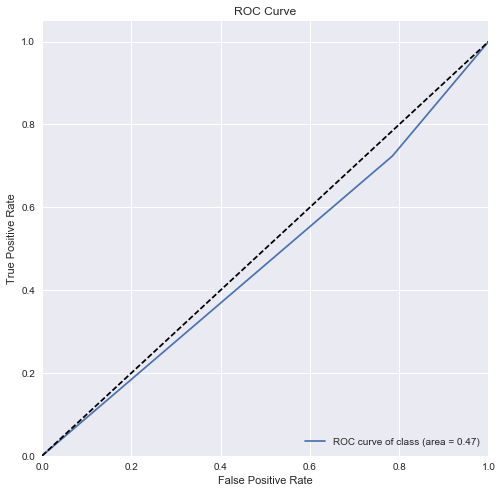

In [12]:
ROCCurves (test["Label"], lr_1n_t3_prediction)

In [13]:
# Linear Regression with ngram = (1, 1), Top 10 News
lr_1n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process,ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_1n_t10_pipeline.fit(train['Combined10'],train['Label'])
lr_1n_t10_prediction = lr_1n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Linear Regression','ngram= (1,1), Top 10 News', test["Label"], lr_1n_t10_prediction) 

Linear Regression
ngram= (1,1), Top 10 News
             precision    recall  f1-score   support

          0       0.47      0.18      0.26       186
          1       0.50      0.80      0.62       192

avg / total       0.48      0.49      0.44       378

Confussion matrix:
 [[ 34 152]
 [ 39 153]]
ROC-AUC: 0.489835349462


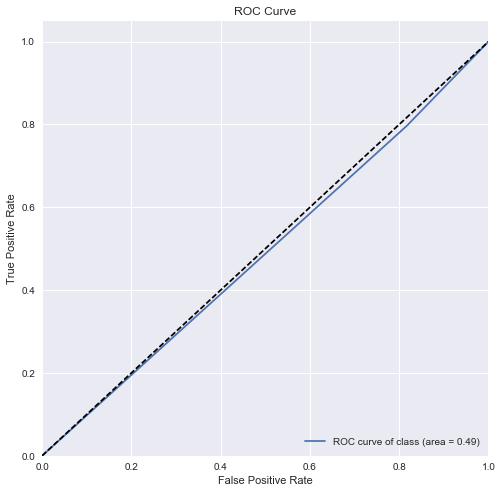

In [44]:
ROCCurves (test["Label"], lr_1n_t10_prediction)

In [14]:
# Linear Regression with ngram = (1, 1), Top 25 News
lr_1n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process,ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_1n_t25_pipeline.fit(train['Combined25'],train['Label'])
lr_1n_t25_prediction = lr_1n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Linear Regression','ngram= (1,1), Top 25 News', test["Label"], lr_1n_t25_prediction) 

Linear Regression
ngram= (1,1), Top 25 News
             precision    recall  f1-score   support

          0       0.48      0.11      0.18       186
          1       0.51      0.89      0.64       192

avg / total       0.49      0.50      0.41       378

Confussion matrix:
 [[ 20 166]
 [ 22 170]]
ROC-AUC: 0.496471774194


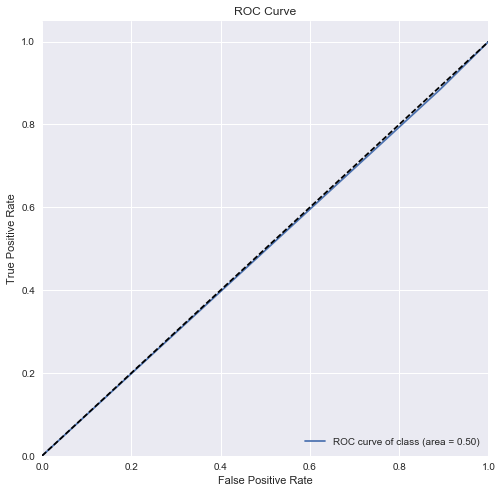

In [45]:
ROCCurves (test["Label"], lr_1n_t25_prediction)

### ngram = (2, 2) with top3, top10, top25 News

In [15]:
# Linear Regression with ngram = (2, 2), Top 3 News
lr_2n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.97, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_2n_t3_pipeline.fit(train['Combined3'],train['Label'])
lr_2n_t3_prediction = lr_2n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Linear Regression','ngram= (2,2), Top 3 News', test["Label"], lr_2n_t3_prediction) 

Linear Regression
ngram= (2,2), Top 3 News
             precision    recall  f1-score   support

          0       0.46      0.32      0.37       186
          1       0.49      0.64      0.55       192

avg / total       0.47      0.48      0.47       378

Confussion matrix:
 [[ 59 127]
 [ 70 122]]
ROC-AUC: 0.476310483871


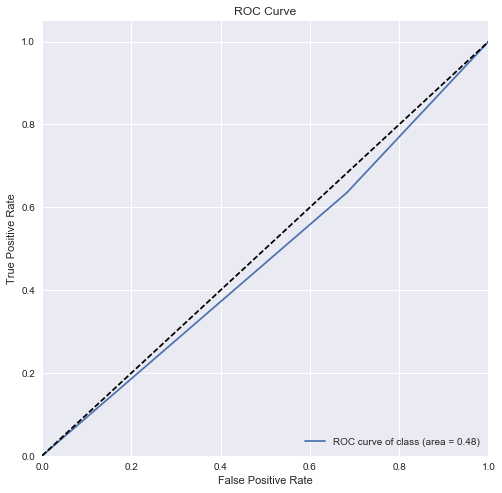

In [46]:
ROCCurves (test["Label"], lr_2n_t3_prediction)

In [16]:
# Linear Regression with ngram = (2, 2), Top 10 News
lr_2n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.97, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_2n_t10_pipeline.fit(train['Combined10'],train['Label'])
lr_2n_t10_prediction = lr_2n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Linear Regression','ngram= (2,2), Top 10 News', test["Label"], lr_2n_t10_prediction) 

Linear Regression
ngram= (2,2), Top 10 News
             precision    recall  f1-score   support

          0       0.44      0.30      0.35       186
          1       0.48      0.63      0.55       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 55 131]
 [ 71 121]]
ROC-AUC: 0.462953629032


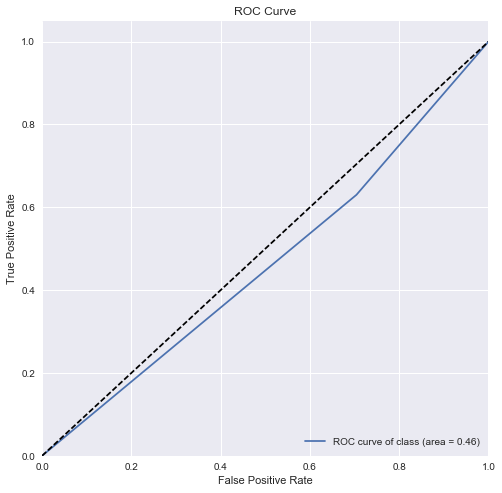

In [47]:
ROCCurves (test["Label"], lr_2n_t10_prediction)

In [17]:
# Linear Regression with ngram = (2, 2), Top 25 News
lr_2n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.97, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_2n_t25_pipeline.fit(train['Combined25'],train['Label'])
lr_2n_t25_prediction = lr_2n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Linear Regression','ngram= (2,2), Top 25 News', test["Label"], lr_2n_t25_prediction) 

Linear Regression
ngram= (2,2), Top 25 News
             precision    recall  f1-score   support

          0       0.43      0.19      0.26       186
          1       0.49      0.76      0.60       192

avg / total       0.46      0.48      0.43       378

Confussion matrix:
 [[ 35 151]
 [ 46 146]]
ROC-AUC: 0.474294354839


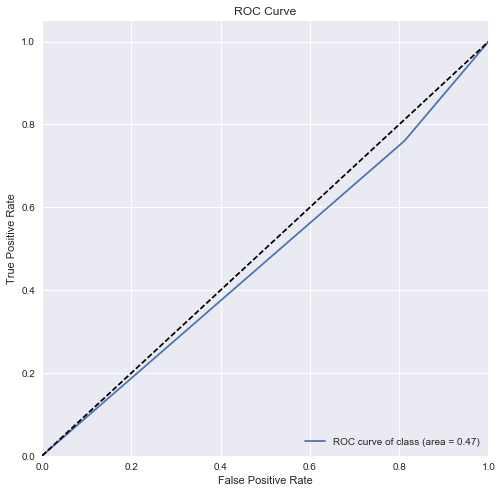

In [48]:
ROCCurves (test["Label"], lr_2n_t25_prediction)

### ngram = (3, 3) with top3, top10, top25 News

In [18]:
# Linear Regression with ngram = (3, 3), Top 3 News
lr_3n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_3n_t3_pipeline.fit(train['Combined3'],train['Label'])
lr_3n_t3_prediction = lr_3n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Linear Regression','ngram= (3,3), Top 3 News', test["Label"], lr_3n_t3_prediction) 

Linear Regression
ngram= (3,3), Top 3 News
             precision    recall  f1-score   support

          0       0.44      0.26      0.33       186
          1       0.49      0.68      0.57       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 48 138]
 [ 61 131]]
ROC-AUC: 0.470178091398


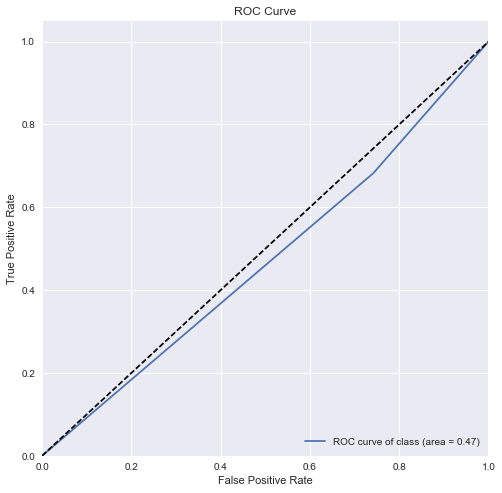

In [49]:
ROCCurves (test["Label"], lr_3n_t3_prediction)

In [19]:
# Linear Regression with ngram = (3, 3), Top 10 News
lr_3n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_3n_t10_pipeline.fit(train['Combined10'],train['Label'])
lr_3n_t10_prediction = lr_3n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Linear Regression','ngram= (3,3), Top 10 News', test["Label"], lr_3n_t10_prediction) 

Linear Regression
ngram= (3,3), Top 10 News
             precision    recall  f1-score   support

          0       0.50      0.26      0.35       186
          1       0.51      0.74      0.61       192

avg / total       0.51      0.51      0.48       378

Confussion matrix:
 [[ 49 137]
 [ 49 143]]
ROC-AUC: 0.504116263441


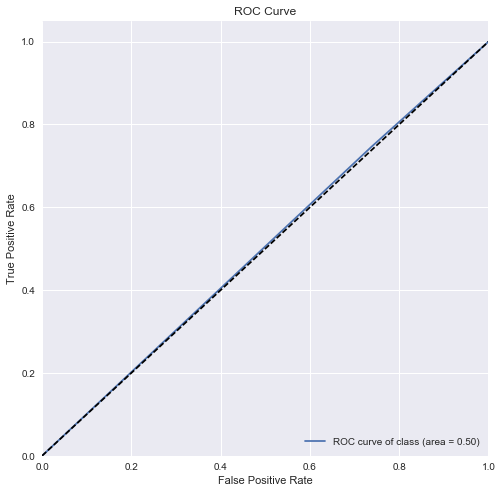

In [50]:
ROCCurves (test["Label"], lr_3n_t10_prediction)

In [20]:
# Linear Regression with ngram = (3, 3), Top 25 News
lr_3n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_3n_t25_pipeline.fit(train['Combined25'],train['Label'])
lr_3n_t25_prediction = lr_3n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Linear Regression','ngram= (3,3), Top 25 News', test["Label"], lr_3n_t25_prediction) 

Linear Regression
ngram= (3,3), Top 25 News
             precision    recall  f1-score   support

          0       0.46      0.13      0.21       186
          1       0.50      0.85      0.63       192

avg / total       0.48      0.50      0.42       378

Confussion matrix:
 [[ 25 161]
 [ 29 163]]
ROC-AUC: 0.491683467742


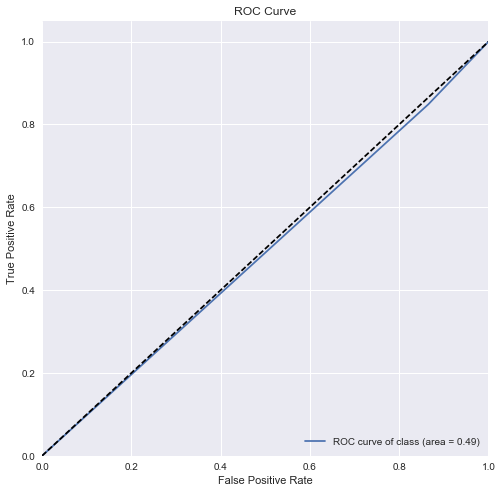

In [51]:
ROCCurves (test["Label"], lr_3n_t25_prediction)

# Bernoulli Naive Bayes

### ngram = (1, 1) with top3, top10, top25 News

In [21]:
# Bernoulli Naive Bayes with ngram = (1, 1), Top 3 News
bnb_1n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.1, max_df = 0.7, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_1n_t3_pipeline.fit(train['Combined3'],train['Label'])
bnb_1n_t3_prediction = bnb_1n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Bernoulli Naive Bayes','ngram= (1,1), Top 3 News', test["Label"], bnb_1n_t3_prediction)  

Bernoulli Naive Bayes
ngram= (1,1), Top 3 News
             precision    recall  f1-score   support

          0       0.56      0.08      0.13       186
          1       0.51      0.94      0.66       192

avg / total       0.54      0.52      0.40       378

Confussion matrix:
 [[ 14 172]
 [ 11 181]]
ROC-AUC: 0.508988575269


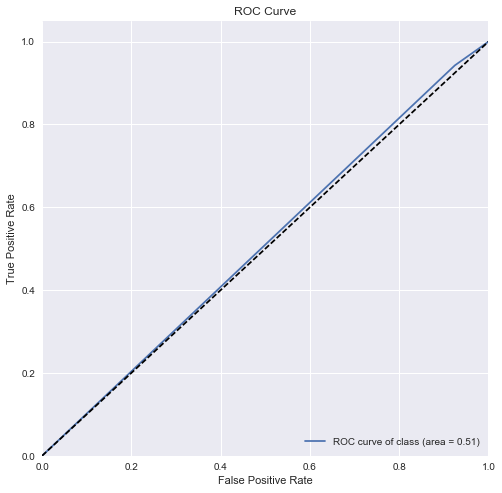

In [52]:
ROCCurves (test["Label"], bnb_1n_t3_prediction)

In [22]:
# Bernoulli Naive Bayes with ngram = (1, 1), Top 10 News
bnb_1n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.1, max_df = 0.7, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_1n_t10_pipeline.fit(train['Combined10'],train['Label'])
bnb_1n_t10_prediction = bnb_1n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Bernoulli Naive Bayes','ngram= (1,1), Top 10 News', test["Label"], bnb_1n_t10_prediction) 

Bernoulli Naive Bayes
ngram= (1,1), Top 10 News
             precision    recall  f1-score   support

          0       0.44      0.30      0.36       186
          1       0.48      0.62      0.54       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 56 130]
 [ 72 120]]
ROC-AUC: 0.463037634409


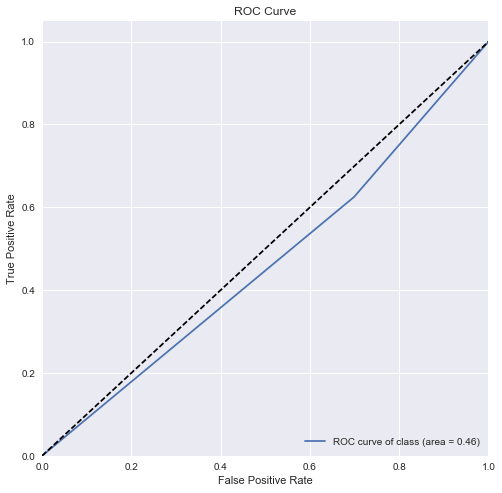

In [53]:
ROCCurves (test["Label"], bnb_1n_t10_prediction)

In [23]:
# Bernoulli Naive Bayes with ngram = (1, 1), Top 25 News
bnb_1n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.1, max_df = 0.7, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_1n_t25_pipeline.fit(train['Combined25'],train['Label'])
bnb_1n_t25_prediction = bnb_1n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Bernoulli Naive Bayes','ngram= (1,1), Top 25 News', test["Label"], bnb_1n_t25_prediction)         

Bernoulli Naive Bayes
ngram= (1,1), Top 25 News
             precision    recall  f1-score   support

          0       0.48      0.41      0.44       186
          1       0.50      0.57      0.53       192

avg / total       0.49      0.49      0.49       378

Confussion matrix:
 [[ 76 110]
 [ 82 110]]
ROC-AUC: 0.490759408602


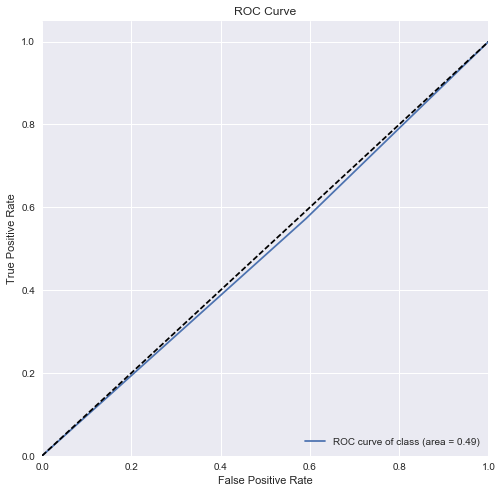

In [54]:
ROCCurves (test["Label"], bnb_1n_t25_prediction)

### ngram = (2, 2) with top3, top10, top25 News

In [24]:
# Bernoulli Naive Bayes with ngram = (2, 2), Top 3 News
bnb_2n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_2n_t3_pipeline.fit(train['Combined3'],train['Label'])
bnb_2n_t3_prediction = bnb_2n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Bernoulli Naive Bayes','ngram= (2,2), Top 3 News', test["Label"], bnb_2n_t3_prediction)  

Bernoulli Naive Bayes
ngram= (2,2), Top 3 News
             precision    recall  f1-score   support

          0       0.49      0.38      0.43       186
          1       0.51      0.62      0.56       192

avg / total       0.50      0.50      0.49       378

Confussion matrix:
 [[ 70 116]
 [ 73 119]]
ROC-AUC: 0.498067876344


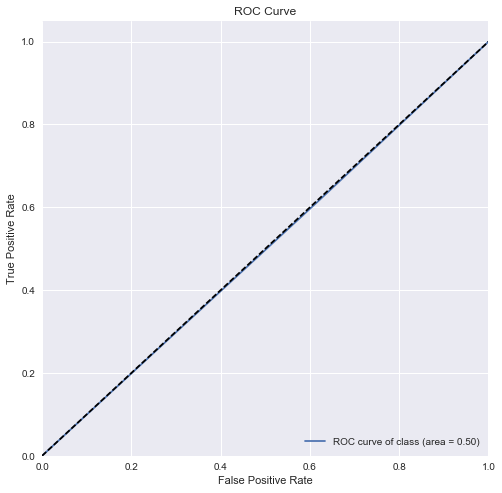

In [55]:
ROCCurves (test["Label"], bnb_2n_t3_prediction)

In [25]:
# Bernoulli Naive Bayes with ngram = (2, 2), Top 10 News
bnb_2n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_2n_t10_pipeline.fit(train['Combined10'],train['Label'])
bnb_2n_t10_prediction = bnb_2n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Bernoulli Naive Bayes','ngram= (2,2), Top 10 News', test["Label"], bnb_2n_t10_prediction)  

Bernoulli Naive Bayes
ngram= (2,2), Top 10 News
             precision    recall  f1-score   support

          0       0.44      0.41      0.42       186
          1       0.46      0.48      0.47       192

avg / total       0.45      0.45      0.45       378

Confussion matrix:
 [[ 77 109]
 [100  92]]
ROC-AUC: 0.446572580645


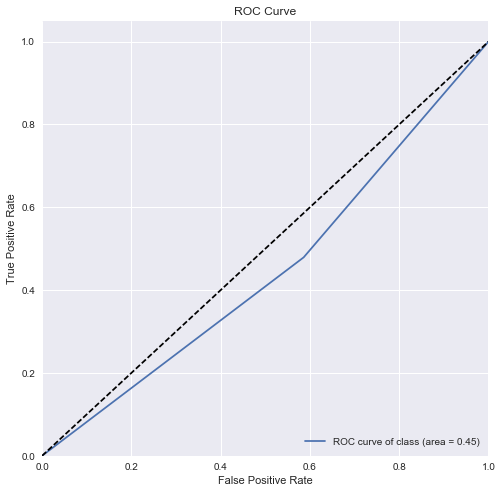

In [56]:
ROCCurves (test["Label"], bnb_2n_t10_prediction)

In [26]:
# Bernoulli Naive Bayes with ngram = (2, 2), Top 25 News
bnb_2n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_2n_t25_pipeline.fit(train['Combined25'],train['Label'])
bnb_2n_t25_prediction = bnb_2n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Bernoulli Naive Bayes','ngram= (2,2), Top 25 News', test["Label"], bnb_2n_t25_prediction)  

Bernoulli Naive Bayes
ngram= (2,2), Top 25 News
             precision    recall  f1-score   support

          0       0.47      0.35      0.41       186
          1       0.50      0.62      0.55       192

avg / total       0.49      0.49      0.48       378

Confussion matrix:
 [[ 66 120]
 [ 73 119]]
ROC-AUC: 0.487315188172


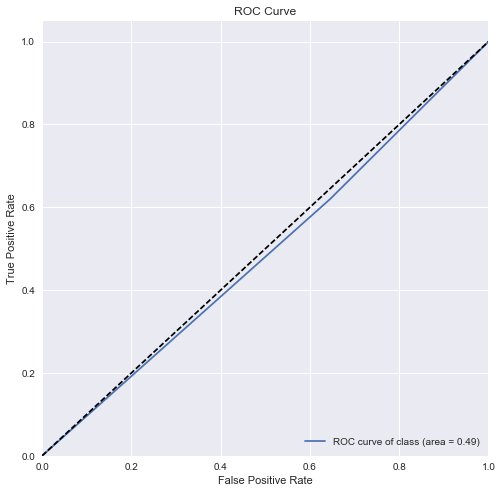

In [57]:
ROCCurves (test["Label"], bnb_2n_t25_prediction)

### ngram = (3, 3) with top3, top10, top25 News

In [27]:
# Bernoulli Naive Bayes with ngram = (3, 3), Top 3 News
bnb_3n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_3n_t3_pipeline.fit(train['Combined3'],train['Label'])
bnb_3n_t3_prediction = bnb_3n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Bernoulli Naive Bayes','ngram= (3,3), Top 3 News', test["Label"], bnb_3n_t3_prediction)  

Bernoulli Naive Bayes
ngram= (3,3), Top 3 News
             precision    recall  f1-score   support

          0       0.49      0.41      0.45       186
          1       0.50      0.58      0.54       192

avg / total       0.50      0.50      0.49       378

Confussion matrix:
 [[ 77 109]
 [ 81 111]]
ROC-AUC: 0.496051747312


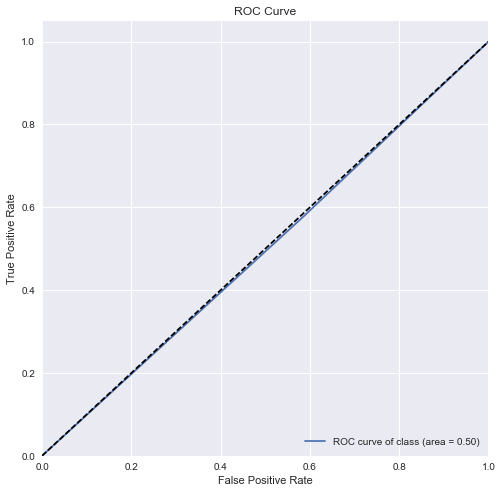

In [58]:
ROCCurves (test["Label"], bnb_3n_t3_prediction)

In [28]:
# Bernoulli Naive Bayes with ngram = (3, 3), no shift, Top 10 News
bnb_3n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_3n_t10_pipeline.fit(train['Combined10'],train['Label'])
bnb_3n_t10_prediction = bnb_3n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Bernoulli Naive Bayes','ngram= (3,3), Top 10 News', test["Label"], bnb_3n_t10_prediction)  

Bernoulli Naive Bayes
ngram= (3,3), Top 10 News
             precision    recall  f1-score   support

          0       0.54      0.47      0.50       186
          1       0.54      0.60      0.57       192

avg / total       0.54      0.54      0.54       378

Confussion matrix:
 [[ 88  98]
 [ 76 116]]
ROC-AUC: 0.538642473118


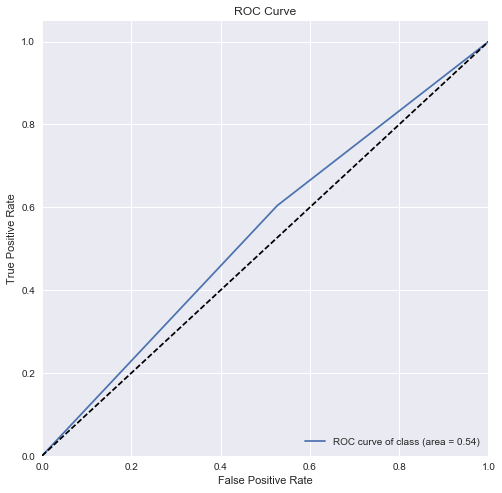

In [59]:
ROCCurves (test["Label"], bnb_3n_t10_prediction)

In [29]:
# Bernoulli Naive Bayes with ngram = (3, 3), no shift, Top 25 News
bnb_3n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_3n_t25_pipeline.fit(train['Combined25'],train['Label'])
bnb_3n_t25_prediction = bnb_3n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Bernoulli Naive Bayes','ngram= (3,3), Top 25 News', test["Label"], bnb_3n_t25_prediction)  

Bernoulli Naive Bayes
ngram= (3,3), Top 25 News
             precision    recall  f1-score   support

          0       0.44      0.30      0.35       186
          1       0.48      0.63      0.55       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 55 131]
 [ 71 121]]
ROC-AUC: 0.462953629032


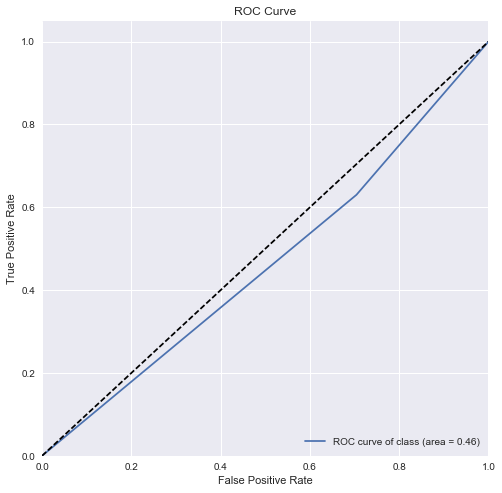

In [60]:
ROCCurves (test["Label"], bnb_3n_t25_prediction)

# Random Forest

### ngram = (1, 1) with top3, top10, top25 News

In [30]:
# Random Forest with ngram = (1, 1), Top 3 News
rf_1n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.01, max_df = 0.99, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_1n_t3_pipeline.fit(train['Combined3'],train['Label'])
rf_1n_t3_prediction = rf_1n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Random Forest','ngram= (1,1), Top 3 News', test["Label"], rf_1n_t3_prediction)  

Random Forest
ngram= (1,1), Top 3 News
             precision    recall  f1-score   support

          0       0.43      0.36      0.39       186
          1       0.46      0.53      0.49       192

avg / total       0.44      0.45      0.44       378

Confussion matrix:
 [[ 67 119]
 [ 90 102]]
ROC-AUC: 0.445732526882


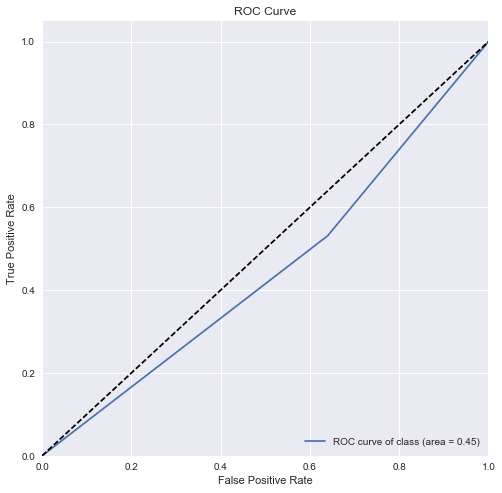

In [61]:
ROCCurves (test["Label"], rf_1n_t3_prediction)

In [31]:
# Random Forest with ngram = (1, 1), Top 10 News
rf_1n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.01, max_df = 0.99, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_1n_t10_pipeline.fit(train['Combined10'],train['Label'])
rf_1n_t10_prediction = rf_1n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Random Forest','ngram= (1,1), Top 10 News', test["Label"], rf_1n_t10_prediction) 

Random Forest
ngram= (1,1), Top 10 News
             precision    recall  f1-score   support

          0       0.52      0.27      0.36       186
          1       0.52      0.76      0.61       192

avg / total       0.52      0.52      0.49       378

Confussion matrix:
 [[ 51 135]
 [ 47 145]]
ROC-AUC: 0.51470094086


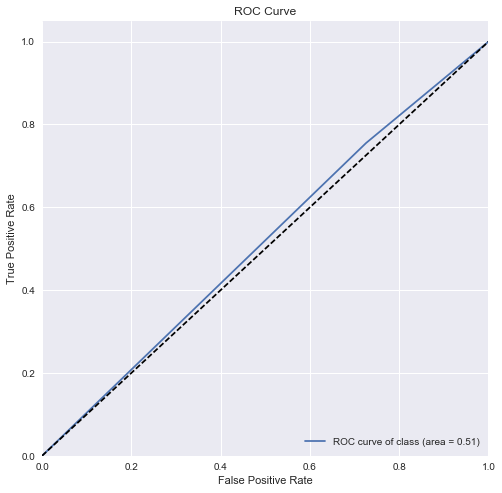

In [62]:
ROCCurves (test["Label"], rf_1n_t10_prediction)

In [32]:
# Random Forest with ngram = (1, 1), Top 25 News
rf_1n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.01, max_df = 0.99, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_1n_t25_pipeline.fit(train['Combined25'],train['Label'])
rf_1n_t25_prediction = rf_1n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Random Forest','ngram= (1,1), Top 25 News', test["Label"], rf_1n_t25_prediction)         

Random Forest
ngram= (1,1), Top 25 News
             precision    recall  f1-score   support

          0       0.51      0.17      0.25       186
          1       0.51      0.84      0.64       192

avg / total       0.51      0.51      0.45       378

Confussion matrix:
 [[ 31 155]
 [ 30 162]]
ROC-AUC: 0.505208333333


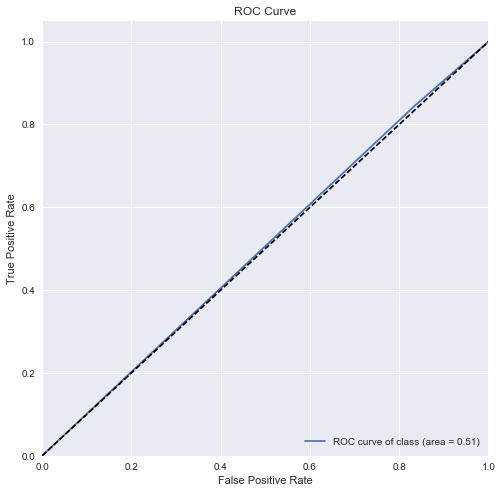

In [63]:
ROCCurves (test["Label"], rf_1n_t25_prediction)

### ngram = (2, 2) with top3, top10, top25 News

In [33]:
# Random Forest with ngram = (2, 2), Top 3 News
rf_2n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_2n_t3_pipeline.fit(train['Combined3'],train['Label'])
rf_2n_t3_prediction = rf_2n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Random Forest','ngram= (2,2), Top 3 News', test["Label"], rf_2n_t3_prediction)  

Random Forest
ngram= (2,2), Top 3 News
             precision    recall  f1-score   support

          0       0.48      0.34      0.40       186
          1       0.50      0.65      0.56       192

avg / total       0.49      0.49      0.48       378

Confussion matrix:
 [[ 63 123]
 [ 68 124]]
ROC-AUC: 0.492271505376


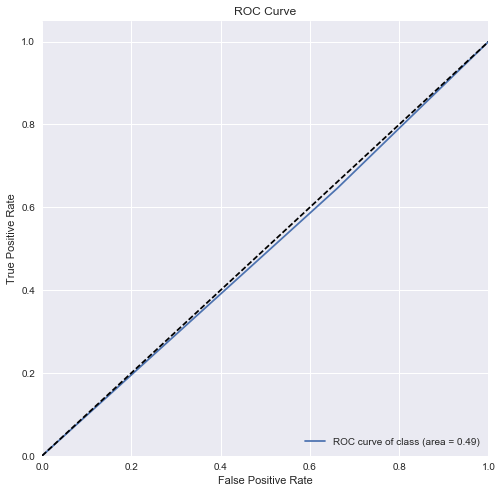

In [64]:
ROCCurves (test["Label"], rf_2n_t3_prediction)

In [34]:
# Random Forest with ngram = (2, 2), Top 10 News
rf_2n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_2n_t10_pipeline.fit(train['Combined10'],train['Label'])
rf_2n_t10_prediction = rf_2n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Random Forest','ngram= (2,2), Top 10 News', test["Label"], rf_2n_t10_prediction) 

Random Forest
ngram= (2,2), Top 10 News
             precision    recall  f1-score   support

          0       0.43      0.32      0.37       186
          1       0.47      0.59      0.53       192

avg / total       0.46      0.46      0.45       378

Confussion matrix:
 [[ 60 126]
 [ 78 114]]
ROC-AUC: 0.458165322581


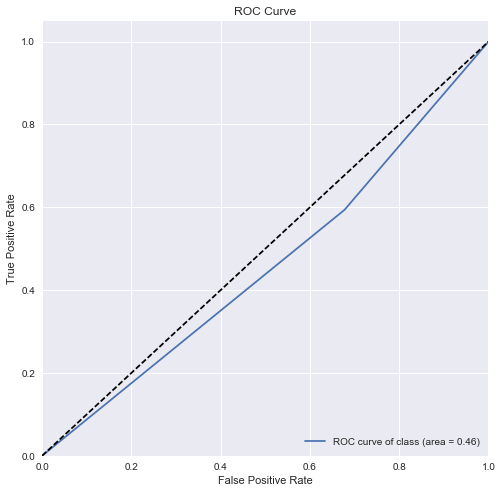

In [65]:
ROCCurves (test["Label"], rf_2n_t10_prediction)

In [35]:
# Random Forest with ngram = (2, 2), Top 25 News
rf_2n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_2n_t25_pipeline.fit(train['Combined25'],train['Label'])
rf_2n_t25_prediction = rf_2n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Random Forest','ngram= (2,2), Top 25 News', test["Label"], rf_2n_t25_prediction)         

Random Forest
ngram= (2,2), Top 25 News
             precision    recall  f1-score   support

          0       0.55      0.25      0.34       186
          1       0.52      0.80      0.63       192

avg / total       0.54      0.53      0.49       378

Confussion matrix:
 [[ 46 140]
 [ 38 154]]
ROC-AUC: 0.524697580645


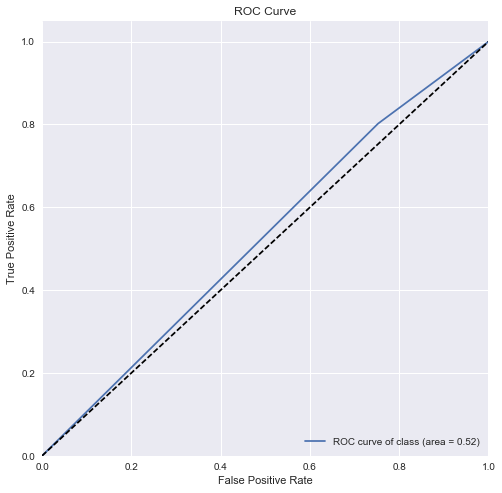

In [66]:
ROCCurves (test["Label"], rf_2n_t25_prediction)

### ngram = (3, 3) with top3, top10, top25 News

In [36]:
# Random Forest with ngram = (3, 3), Top 3 News
rf_3n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_3n_t3_pipeline.fit(train['Combined3'],train['Label'])
rf_3n_t3_prediction = rf_3n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Random Forest','ngram= (3,3), Top 3 News', test["Label"], rf_3n_t3_prediction)  

Random Forest
ngram= (3,3), Top 3 News
             precision    recall  f1-score   support

          0       0.41      0.33      0.37       186
          1       0.45      0.53      0.49       192

avg / total       0.43      0.43      0.43       378

Confussion matrix:
 [[ 62 124]
 [ 90 102]]
ROC-AUC: 0.432291666667


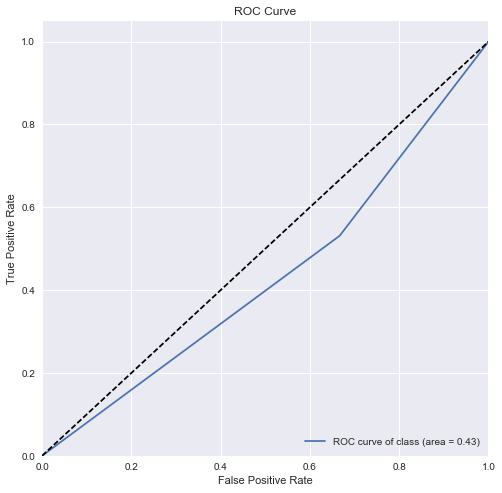

In [67]:
ROCCurves (test["Label"], rf_3n_t3_prediction)

In [37]:
# Random Forest with ngram = (3, 3), Top 10 News
rf_3n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_3n_t10_pipeline.fit(train['Combined10'],train['Label'])
rf_3n_t10_prediction = rf_3n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Random Forest','ngram= (3,3), Top 10 News', test["Label"], rf_3n_t10_prediction) 

Random Forest
ngram= (3,3), Top 10 News
             precision    recall  f1-score   support

          0       0.47      0.35      0.41       186
          1       0.50      0.62      0.55       192

avg / total       0.49      0.49      0.48       378

Confussion matrix:
 [[ 66 120]
 [ 73 119]]
ROC-AUC: 0.487315188172


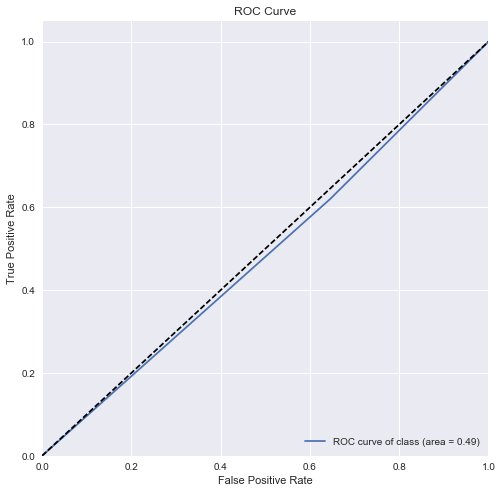

In [68]:
ROCCurves (test["Label"], rf_3n_t10_prediction)

In [38]:
# Random Forest with ngram = (3, 3), Top 25 News
rf_3n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_3n_t25_pipeline.fit(train['Combined25'],train['Label'])
rf_3n_t25_prediction = rf_3n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Random Forest','ngram= (3,3), Top 25 News', test["Label"], rf_3n_t25_prediction)         

Random Forest
ngram= (3,3), Top 25 News
             precision    recall  f1-score   support

          0       0.47      0.30      0.36       186
          1       0.50      0.67      0.57       192

avg / total       0.48      0.49      0.47       378

Confussion matrix:
 [[ 55 131]
 [ 63 129]]
ROC-AUC: 0.483786962366


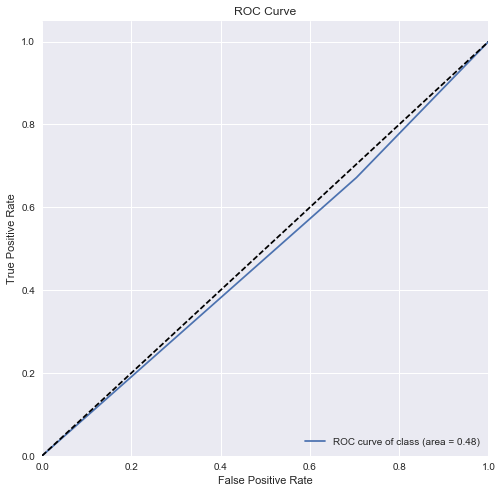

In [69]:
ROCCurves (test["Label"], rf_3n_t25_prediction)

# Performance Comparison

In [71]:
# Show the top 20 model performance sorted on AUC performance
df_ScoreSummaryByMethod=DataFrame(ScoreSummaryByMethod,columns=['Method','Comment','ROC_AUC','Precision','Accuracy','Recall','F1'])
df_ScoreSummaryByMethod.sort_values(['ROC_AUC'],ascending=False,inplace=True)
df_ScoreSummaryByMethod.head(20)

,Method,Comment,ROC_AUC,Precision,Accuracy,Recall,F1
16,Bernoulli Naive Bayes,"ngram= (3,3), Top 10 News",0.538642,0.542056,0.539683,0.604167,0.571429
23,Random Forest,"ngram= (2,2), Top 25 News",0.524698,0.523810,0.529101,0.802083,0.633745
19,Random Forest,"ngram= (1,1), Top 10 News",0.514701,0.517857,0.518519,0.755208,0.614407
9,Bernoulli Naive Bayes,"ngram= (1,1), Top 3 News",0.508989,0.512748,0.515873,0.942708,0.664220
20,Random Forest,"ngram= (1,1), Top 25 News",0.505208,0.511041,0.510582,0.843750,0.636542
7,Linear Regression,"ngram= (3,3), Top 10 News",0.504116,0.510714,0.507937,0.744792,0.605932
12,Bernoulli Naive Bayes,"ngram= (2,2), Top 3 News",0.498068,0.506383,0.500000,0.619792,0.557377
2,Linear Regression,"ngram= (1,1), Top 25 News",0.496472,0.505952,0.502646,0.885417,0.643939
15,Bernoulli Naive Bayes,"ngram= (3,3), Top 3 News",0.496052,0.504545,0.497354,0.578125,0.538835
21,Random Forest,"ngram= (2,2), Top 3 News",0.492272,0.502024,0.494709,0.645833,0.564920


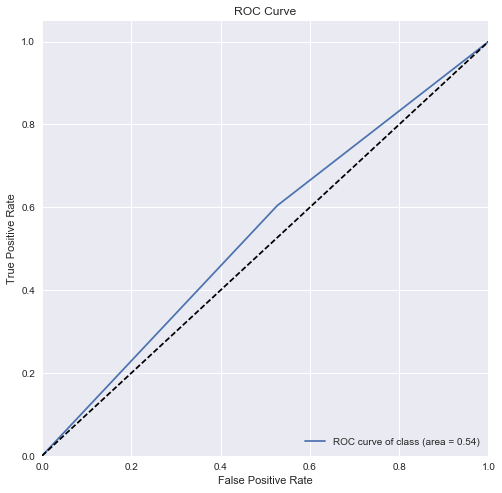

In [70]:
ROCCurves (test["Label"], bnb_3n_t10_prediction)

# Other insight: Key Words Visualization

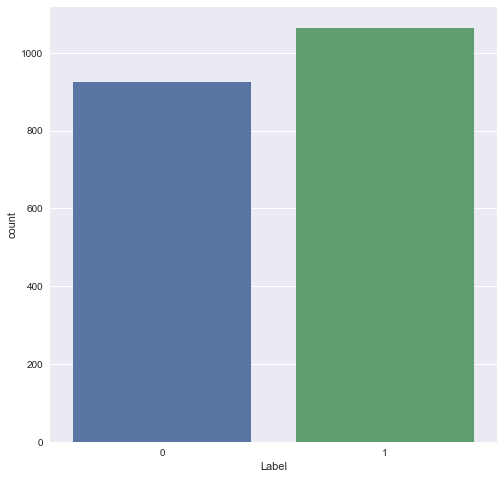

In [40]:
# Check the Label 1 and 0 proportion
sns.countplot(x='Label', data=df)

### Label 1 is slight larger than Label 0, but not too much difference

In [41]:
# Word preprocessing before doing word cloud
def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

df['Combined']=df.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)
non_down = df[df['Label']==1]
down = df[df['Label']==0]

non_down_word = []
down_word = []
for word in non_down['Combined']:
    non_down_word.append(to_words(word))
for word in down['Combined']:
    down_word.append(to_words(word))

## Label 0 Word Visualization

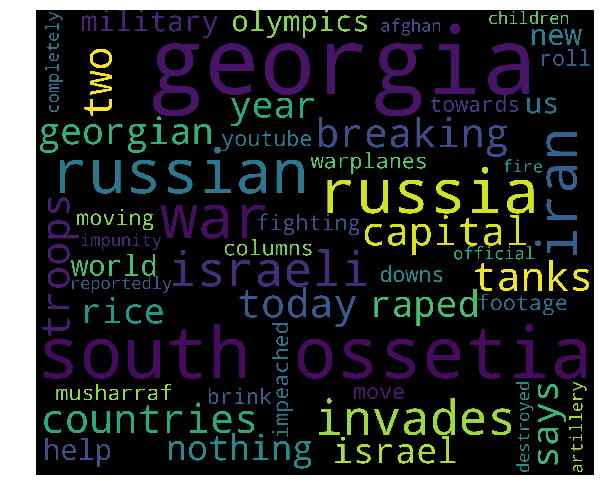

In [42]:
wordcloud_down = WordCloud(background_color='black',
                          width=3000,
                          height=2500,
                          max_words=50, 
                          ).generate(down_word[0])

plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud_down)
plt.axis('off')
plt.show()

## Label 1 Word Visualization

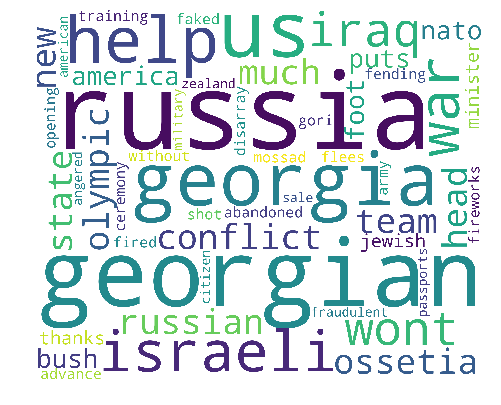

In [43]:
wordcloud_non = WordCloud(background_color='white',
                         width=3000,
                         height=2500,
                         max_words=50,
                         ).generate(non_down_word[0])
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_non)
plt.axis('off')
plt.show()

# Future Work
1. Do GridSearch CV to do parameter tuning to find the better hypoparameter for every model
2. Do more research to find what specific key words will cause stock close price change, and give them more weight in our algorithm